<a href="https://colab.research.google.com/github/SteefanContractor/optPortfolio/blob/master/marginloan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 12.1 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=6fd9ccb9321bc124d1677a69463f79201a70df7662acaa6926a548fcdfd272c8
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import pandas as pd
# the yahoo-finance package let's us download asset data 
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as sco
from scipy import stats

np.random.seed(2718)

In [4]:
tickers = ['FAIR.AX', 'ETHI.AX', 'ESGI.AX', 'IEM.AX', 'IAF.AX', 'GOLD.AX'] # also check out VAS and IOO instead of RARI and ETHI

def get_data(tickers):
    for tic in tickers:
        #get data on this ticker
        ticker = yf.Ticker(tic)
        #get the historical prices for this ticker
        tickerdf = ticker.history(period='max')[['Close']]
        tickerdf.rename(columns={'Close': tic[:-3]}, inplace=True)
        if tic == tickers[0]:
            df = tickerdf
        else:
            df = df.join(tickerdf, how='inner', rsuffix='_'+tic)
    return df


#see your data
df = get_data(tickers)

In [5]:
df

,FAIR,ETHI,ESGI,IEM,IAF,GOLD
Date,,,,,,
2018-03-06,15.110000,7.29,19.953300,62.009998,106.169998,161.020004
2018-03-07,15.200000,7.21,19.987400,61.930000,106.080002,161.309998
2018-03-08,15.310000,7.30,20.120001,62.099998,106.099998,160.100006
2018-03-09,15.420000,7.36,20.120001,62.849998,106.110001,159.850006
2018-03-12,15.590000,7.42,20.320000,63.220001,106.019997,158.820007
...,...,...,...,...,...,...
2021-09-13,20.580000,12.66,29.879999,70.839996,114.199997,227.220001
2021-09-14,20.490000,12.72,30.059999,71.209999,114.309998,227.949997
2021-09-15,20.590000,12.70,29.990000,70.870003,114.599998,229.639999


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f938fbaed50>,
      dtype=object)

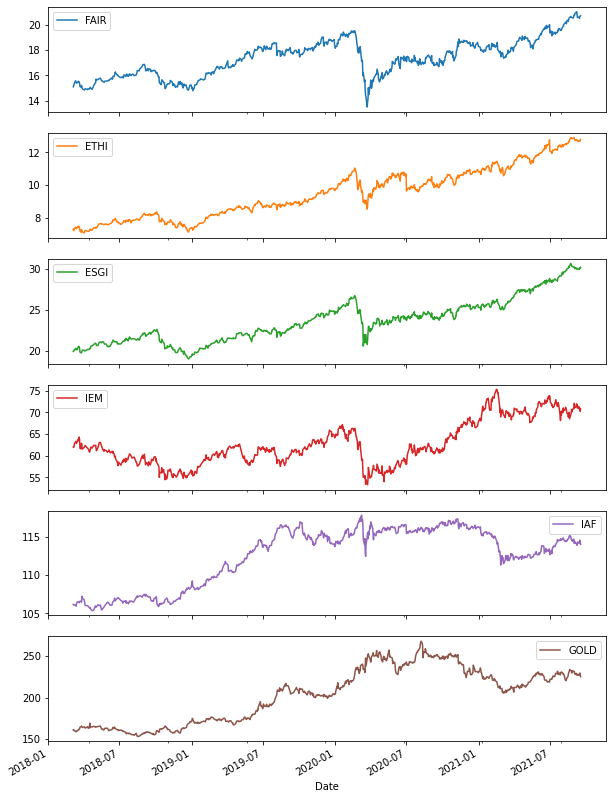

In [7]:
df.plot(subplots=True, figsize=(10,15))

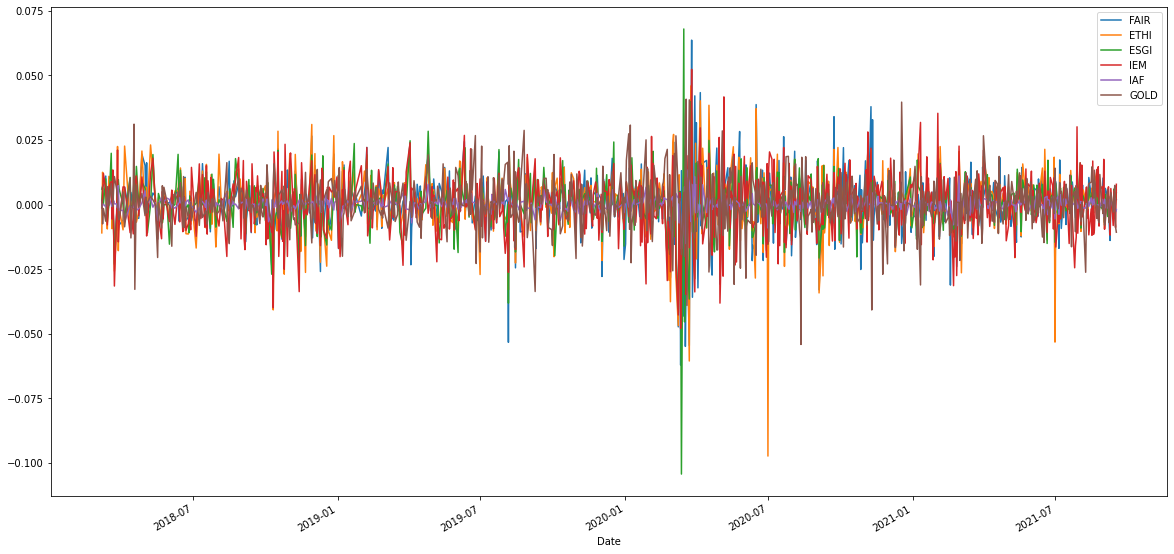

In [9]:
# Calculate daily returns
returns = df.pct_change()
returns.plot(figsize=(20,10))

In [14]:
# Calculate the market drop that results in a margin call
market_drop = 0.25
initial_value = 4e5
loan_value = 2.2e5
market_value = (1-market_drop)*initial_value
lending_ratio = 0.6
lending_value = lending_ratio*market_value
percentage_buffer = 0.1*initial_value
percentage_buffer, loan_value - lending_value

(40000.0, 40000.0)

In [16]:
portfolio_weights = [1./6 for i in range(6)]


[0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666]